<a href="https://colab.research.google.com/github/GlezRuben/Machine-Learning/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decision Trees

## Objectives

After completing this lab you will be able to:

* Develop a classification model using Decision Tree Algorithm

In this lab exercise, you will learn a popular machine learning algorithm, Decision Trees. You will use this classification algorithm to build a model to estimate the precise number of occupants in a room using multiple non-intrusive environmental sensors like temperature, light, sound, CO2 and PIR.

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">About the dataset</a></li>
        <li><a href="#downloading_data">Downloading the Data</a></li>
        <li><a href="#pre-processing">Pre-processing</a></li>
        <li><a href="#setting_up_tree">Setting up the Decision Tree</a></li>
        <li><a href="#modeling">Modeling</a></li>
        <li><a href="#prediction">Prediction</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
        <li><a href="#visualization">Visualization</a></li>
    </ol>
</div>
<br>
<hr>

Import the Following Libraries:
<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>

In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

<div id="about_dataset">
    <h2>About the dataset</h2>
    The experimental testbed for occupancy estimation was deployed in a 6m Ã— 4.6m room. The setup consisted of 7 sensor nodes and one edge node in a star configuration with the sensor nodes transmitting data to the edge every 30s using wireless transceivers. No HVAC systems were in use while the dataset was being collected.
    <br>
    <br>
    Five different types of non-intrusive sensors were used in this experiment: temperature, light, sound, CO2 and digital passive infrared (PIR). The CO2, sound and PIR sensors needed manual calibration. For the CO2 sensor, zero-point calibration was manually done before its first use by keeping it in a clean environment for over 20 minutes and then pulling the calibration pin (HD pin) low for over 7s. The sound sensor is essentially a microphone with a variable-gain analog amplifier attached to it. Therefore, the output of this sensor is analog which is read by the microcontrollerâ€™s ADC in volts. The potentiometer tied to the gain of the amplifier was adjusted to ensure the highest sensitivity. The PIR sensor has two trimpots: one to tweak the sensitivity and the other to tweak the time for which the output stays high after detecting motion. Both of these were adjusted to the highest values. Sensor nodes S1-S4 consisted of temperature, light and sound sensors, S5 had a CO2 sensor and S6 and S7 had one PIR sensor each that were deployed on the ceiling ledges at an angle that maximized the sensorâ€™s field of view for motion detection.
    <br>
    <br>
    The data was collected for a period of 4 days in a controlled manner with the occupancy in the room varying between 0 and 3 people. The ground truth of the occupancy count in the room was noted manually.
</div>

<div id="downloading_data"> 
    <h2>Downloading the Data</h2>
    We will download the dataset from the Machine Learning Repository.
</div>

In [6]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00640/Occupancy_Estimation.csv'

Now, read the data using pandas dataframe:

In [7]:
my_data = pd.read_csv(path, index_col=False, header=0)
my_data[0:5]

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


 What is the size of data?

In [8]:
# write your code here
my_data.shape

(10129, 19)

<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>

Using <b>my_data</b> as the Occupancy_Estimation.csv data read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>
    <li> <b> y </b> as the <b> response vector </b> (target) </li>
</ul>

As you may figure out, some features in this dataset are categorical, such as __Date__ or __Time__. Unfortunately, Sklearn Decision Trees does not handle categorical variables. For this reason, we will remove the columns that corresponds to this features.

In [25]:
X = my_data[['S1_Temp', 'S2_Temp', 'S3_Temp','S4_Temp','S1_Light','S2_Light','S3_Light','S4_Light','S1_Sound','S2_Sound','S3_Sound','S4_Sound','S5_CO2','S5_CO2_Slope','S6_PIR','S7_PIR']].values
X[0:5]

array([[2.49400000e+01, 2.47500000e+01, 2.45600000e+01, 2.53800000e+01,
        1.21000000e+02, 3.40000000e+01, 5.30000000e+01, 4.00000000e+01,
        8.00000000e-02, 1.90000000e-01, 6.00000000e-02, 6.00000000e-02,
        3.90000000e+02, 7.69230769e-01, 0.00000000e+00, 0.00000000e+00],
       [2.49400000e+01, 2.47500000e+01, 2.45600000e+01, 2.54400000e+01,
        1.21000000e+02, 3.30000000e+01, 5.30000000e+01, 4.00000000e+01,
        9.30000000e-01, 5.00000000e-02, 6.00000000e-02, 6.00000000e-02,
        3.90000000e+02, 6.46153846e-01, 0.00000000e+00, 0.00000000e+00],
       [2.50000000e+01, 2.47500000e+01, 2.45000000e+01, 2.54400000e+01,
        1.21000000e+02, 3.40000000e+01, 5.30000000e+01, 4.00000000e+01,
        4.30000000e-01, 1.10000000e-01, 8.00000000e-02, 6.00000000e-02,
        3.90000000e+02, 5.19230769e-01, 0.00000000e+00, 0.00000000e+00],
       [2.50000000e+01, 2.47500000e+01, 2.45600000e+01, 2.54400000e+01,
        1.21000000e+02, 3.40000000e+01, 5.30000000e+01, 4.000

Now we can fill the target variable.


In [26]:
y = my_data["Room_Occupancy_Count"]
y[0:5]

0    1
1    1
2    1
3    1
4    1
Name: Room_Occupancy_Count, dtype: int64

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>

In [27]:
from sklearn.model_selection import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.

In [28]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

Print the shape of X_trainset and y_trainset. Ensure that the dimensions match.

In [29]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (7090, 16) &  Size of Y training set (7090,)


Print the shape of X_testset and y_testset. Ensure that the dimensions match.

In [30]:
print('Shape of X test set {}'.format(X_testset.shape),'&',' Size of Y test set {}'.format(y_testset.shape))

Shape of X test set (3039, 16) &  Size of Y test set (3039,)


<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>occupancyTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>

In [48]:
occupancyTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
occupancyTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=3)

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>

In [49]:
occupancyTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>

In [50]:
predTree = occupancyTree.predict(X_testset)

You can print out predTree and y_testset if you want to visually compare the predictions to the actual values.

In [51]:
print (predTree [0:5])
print (y_testset [0:5])

[0 3 0 0 1]
1897    0
213     3
9864    0
8962    0
577     1
Name: Room_Occupancy_Count, dtype: int64


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>

In [52]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9779532741033234


Accuracy classification score computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

<hr>

<div id="visualization">
    <h2>Visualization</h2>
    
    
Let's visualize the tree
</div>

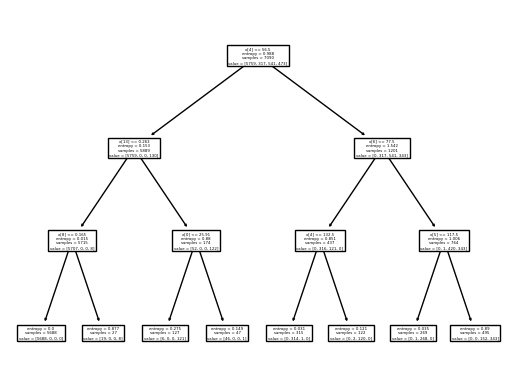

In [53]:
tree.plot_tree(occupancyTree)
plt.show()

#Acknowledgment:

This code is based on the Lab made by Saeed Aghabozorgi.

Tha dataset was obtained on the Machine Learning Repository:
Adarsh Pal Singh, Vivek Jain, Sachin Chaudhari, Frank Alexander Kraemer, Stefan Werner and Vishal Garg, â€œMachine Learning-Based Occupancy Estimation Using Multivariate Sensor Nodes,â€ in 2018 IEEE Globecom Workshops (GC Wkshps), 2018.